# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

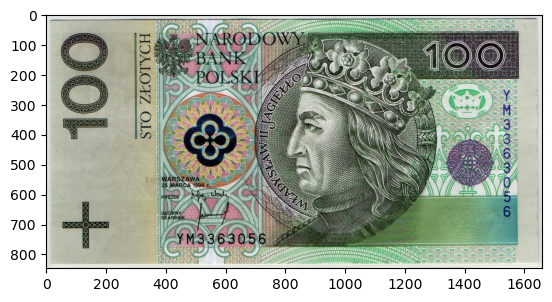

In [2]:
pln = cv2.imread(fileName)
plt.imshow(pln)

In [3]:
def extract_nth_bit(image, bit_num):
    # save only those RGB bits in which bit_num bit occurs
    nth_bit = (image & 2**bit_num)
    return nth_bit

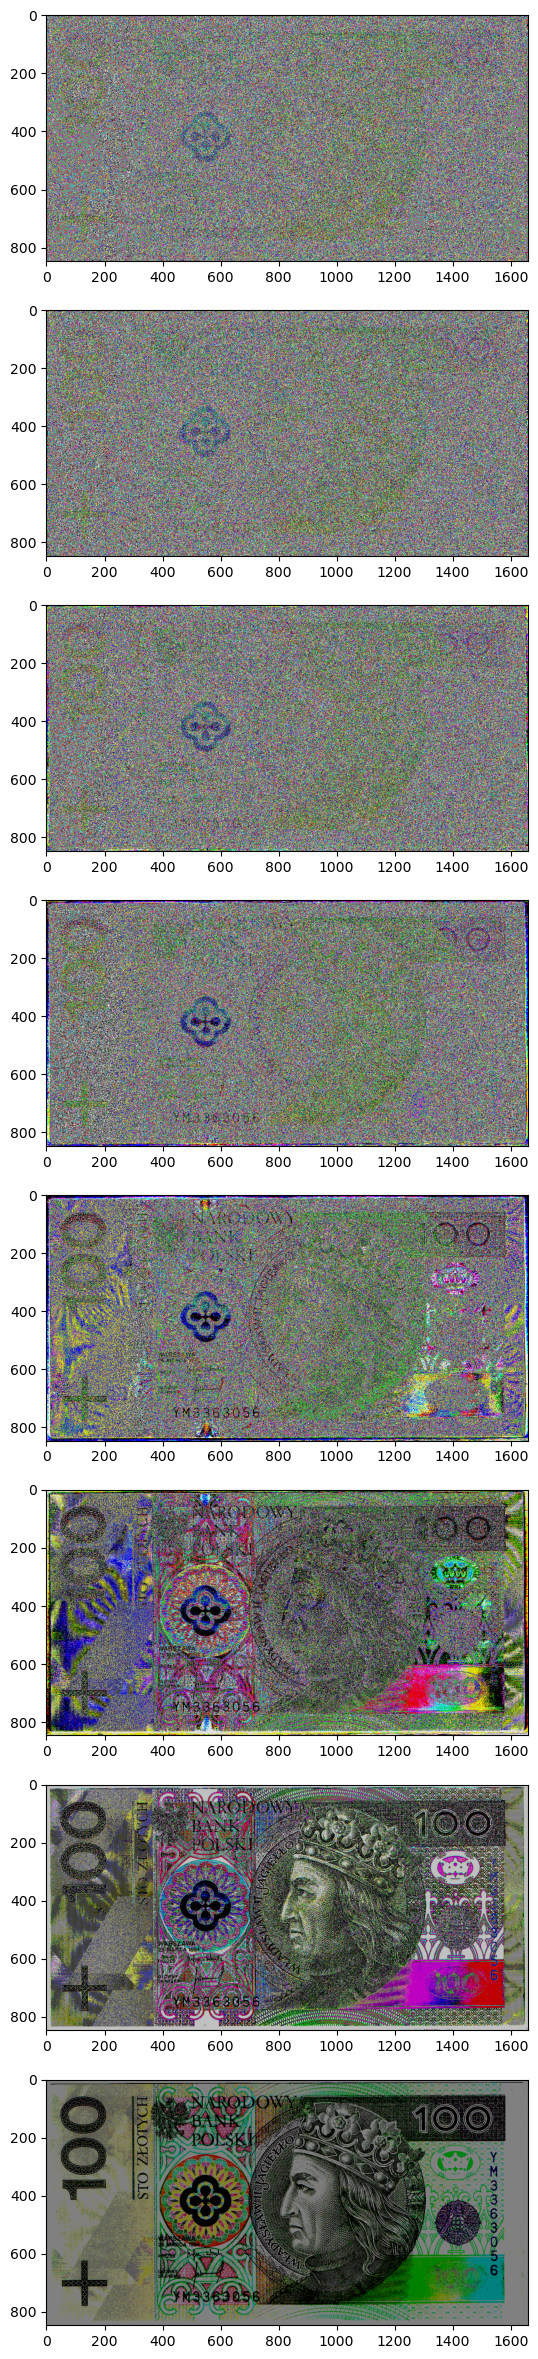

In [4]:
# each matching bit is multiplied by 255 for better visualization
bit_planes = []

fig, axs = plt.subplots(8, figsize=(15, 30))

for i in range(0, 8):
    extracted = extract_nth_bit(pln, i) 
    bit_planes.append(extracted)
    vis = extracted * 255
    axs[i].imshow(vis)

In [5]:
size = pln.size
row_size = pln[0].size
# RGB pixel
pixel_size = pln[0][0].size
print(f"Size: {size}\nRow size: {row_size}\nPixel size: {pixel_size}")

Size: 4220601
Row size: 4983
Pixel size: 3


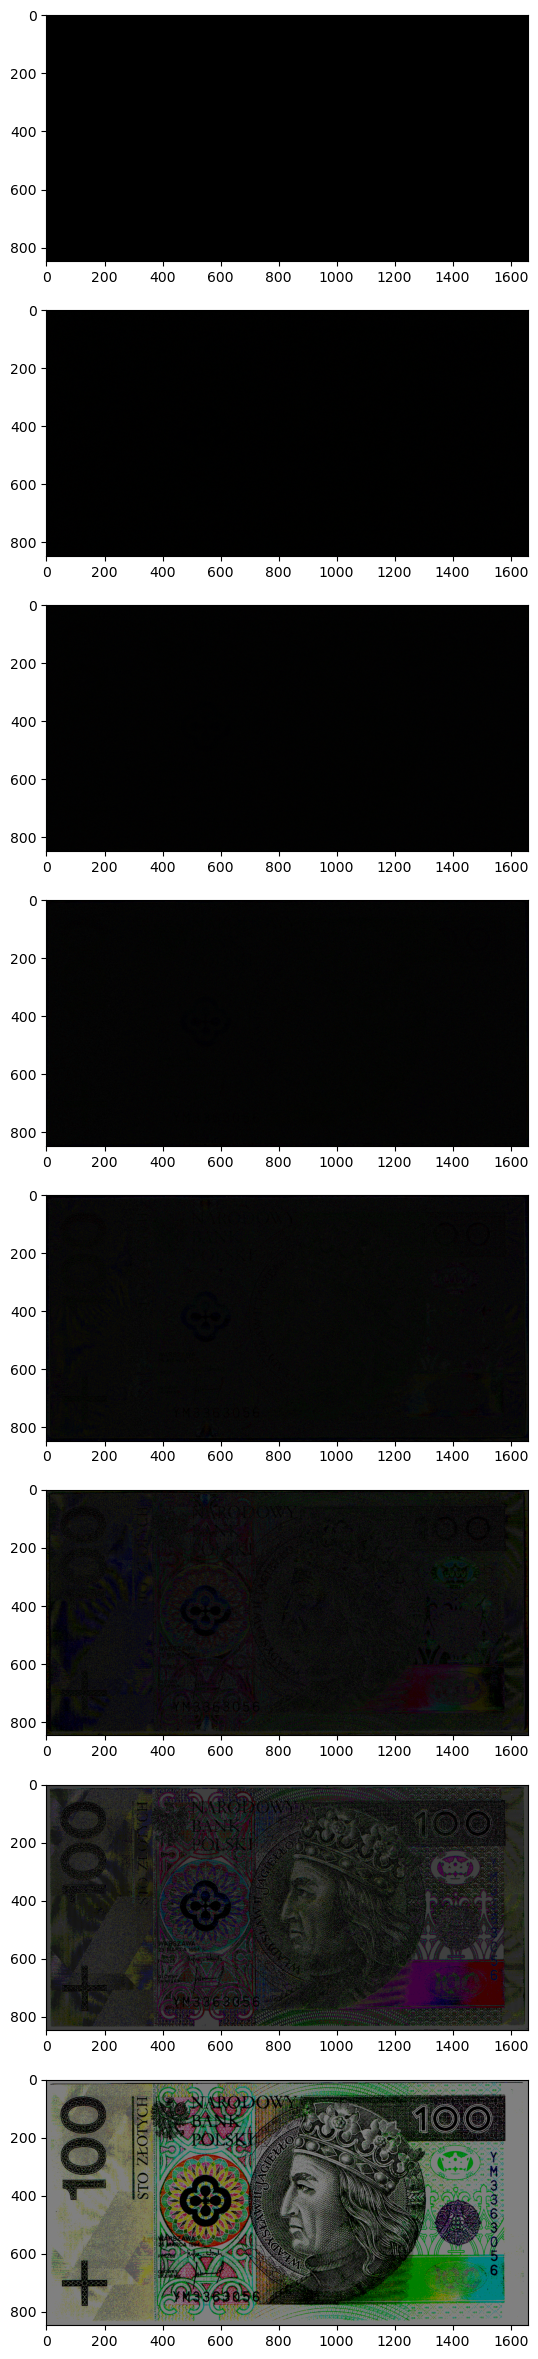

In [6]:
# visualize raw bit planes
fig, axs = plt.subplots(8, figsize=(15, 30))

for i in range(0, 8):
    axs[i].imshow(bit_planes[i])

### Reconstructions

6th + 7th bit plane

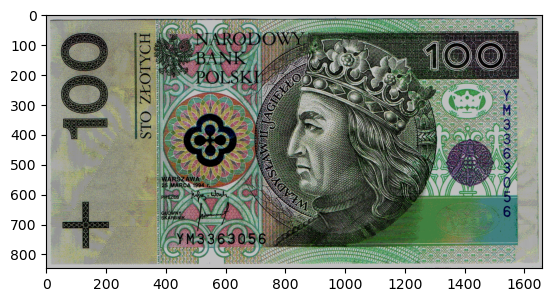

In [7]:
img1 = bit_planes[6] + bit_planes[7]    
plt.imshow(img1)

Sum all bit planes -> get original image

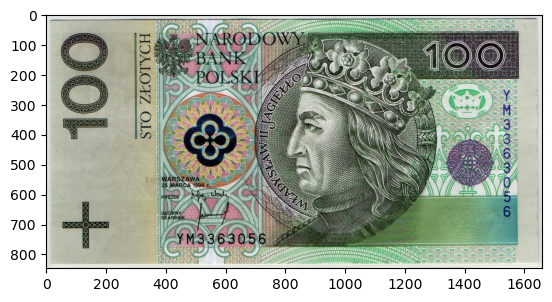

In [8]:
img2 = bit_planes[0] + bit_planes[1] + bit_planes[2] + bit_planes[3] + bit_planes[4] + bit_planes[5] + bit_planes[6] + bit_planes[7]
plt.imshow(img2)

0 - 6 bit planes sum

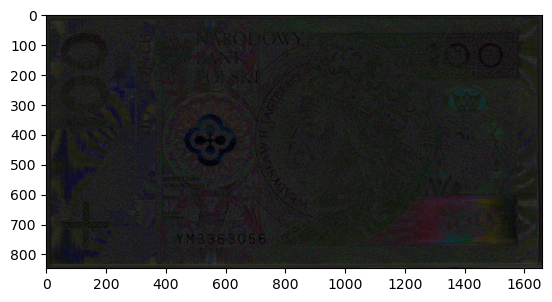

In [9]:
img2 = bit_planes[0] + bit_planes[1] + bit_planes[2] + bit_planes[3] + bit_planes[4] + bit_planes[5]
plt.imshow(img2)